# Explore here

In [14]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
df1 = df[['Latitude','Longitude','MedInc']]
df1


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df1,test_size=0.2,random_state=42)
print(X_train.shape)


(16512, 3)


In [17]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6,random_state=42)
model.fit(X_train)

X_train['cluster'] = model.predict(X_train)

X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


<Axes: xlabel='Latitude', ylabel='Longitude'>

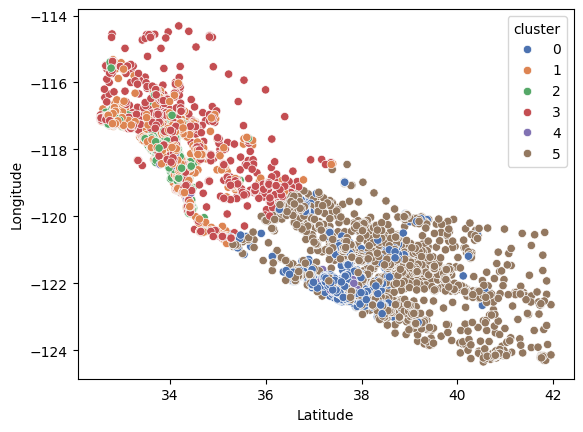

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=X_train,x='Latitude',y='Longitude',hue='cluster',palette='deep')

<Axes: xlabel='Latitude', ylabel='MedInc'>

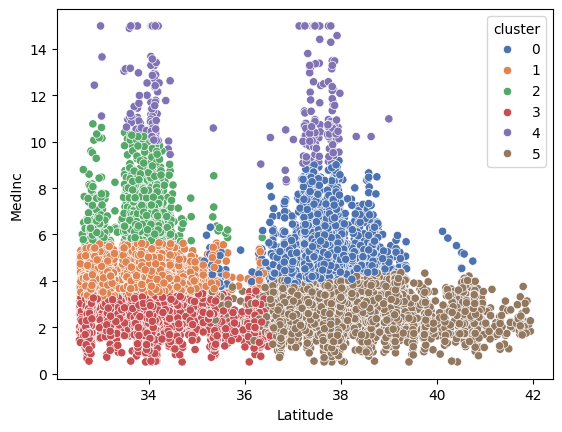

In [19]:
sns.scatterplot(data=X_train,x='Latitude',y='MedInc',hue='cluster',palette='deep')

<Axes: xlabel='Longitude', ylabel='MedInc'>

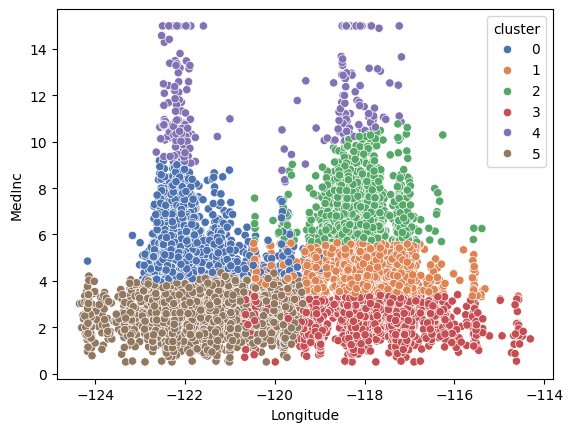

In [20]:
sns.scatterplot(data=X_train,x='Longitude',y='MedInc',hue='cluster',palette='deep')

In [21]:
X_test['cluster'] = model.predict(X_test)
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


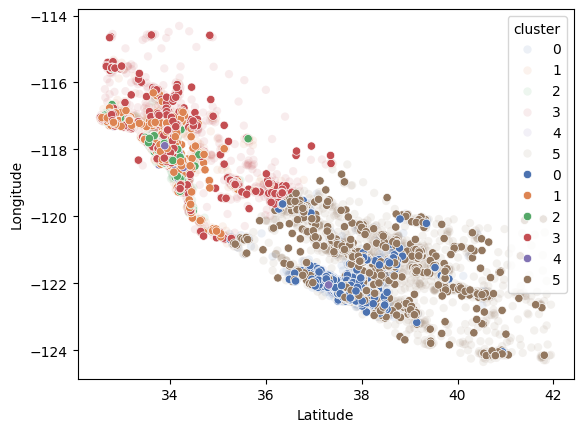

In [25]:
sns.scatterplot(data=X_train,x='Latitude',y='Longitude',hue='cluster',palette='deep',alpha = 0.1)
sns.scatterplot(data=X_test,x='Latitude',y='Longitude',hue='cluster',palette='deep',markers = '*')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

y_train = X_train.cluster
X_train = X_train.drop(['cluster'],axis=1)

model_dt.fit(X_train,y_train)
model_rf.fit(X_train,y_train)

y_test = X_test.cluster
X_test = X_test.drop(['cluster'],axis=1)

y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

as_dt = accuracy_score(y_test,y_pred_dt)
as_rf = accuracy_score(y_test,y_pred_rf)

print(f'La precision del arbol de decision es de {as_dt} y de random forest es {as_rf}')

La precision del arbol de decision es de 0.9941860465116279 y de random forest es 0.9956395348837209


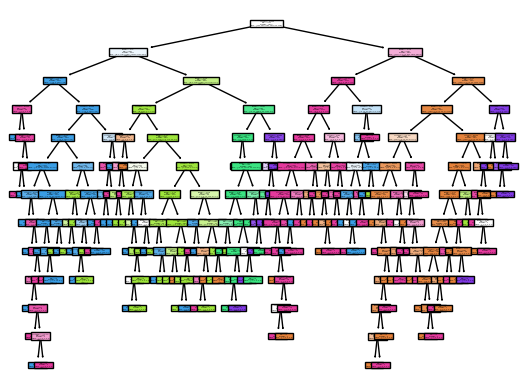

In [34]:
from sklearn import tree

tree.plot_tree(model_dt,feature_names=X_train.columns,class_names=['0','1','2','3','4','5'],filled=True)
plt.show()

In [35]:
from pickle import dump

dump(model,open('../models/model_kmean.model','wb'))
dump(model_dt,open('../models/model_dt.model','wb'))
dump(model_rf,open('../models/model_rf.model','wb'))